# A Comprehensive Survey of Scoring Functions for Protein Docking Models 

This notebook contains all parts of the code needed for computing AUC, Classification Metrics, and Success Rate discussed in "A Comprehensive Survey of Scoring Functions for Protein Docking Models" paper.

- <b>1</b>: CAPRI-score dataset 
- <b>2</b>: CAPRI-score-Refined dataset
- <b>3</b>: 19 Complexes from BM4 dataset
- <b>4</b>: 15 Complexes from BM5 dataset
- <b>5</b>: DockGround dataset 
- <b>6</b>: PDB-2023 dataset 
- <b>7</b>: MaSIF-test dataset 



#### Author:
Azam Shirali (ashir018@fiu.edu) <br>
Bioinformatics Research Group (BioRG) - Florida International University

In [1]:
import os
import numpy as np
import pandas as pd

# 1. CAPRI-score dataset

## Obtain scores for all methods 

86 samples are discarded from the dataset, because some methods could not deal with them. 

In [2]:
CAPRI_scores = pd.read_csv('CAPRI-score_scores&labels.csv')
CAPRI_scores 


,PDB,seqid,classification,PID,label,HADDOCK,ZRANK2,ROSETTADOCK,PYDOCK_TOT,SIPPER,AP_PISA,FIREDOCK,CP_PIE,GNN-DOVE,dMaSIF,DeepRank-GNN,PIsToN
0,T29_0,90.9,incorrect,T29,0,-101.89050,2123.3300,552.699,10.621,-9.205,0.2524,-42.71,0.277280,0.3467,-0.860945,0.010280,1.929208
1,T29_1,90.9,incorrect,T29,0,-99.30190,92.4391,27.694,-7.678,-2.879,0.0717,-28.57,0.604099,0.2274,-1.574697,0.010280,0.491771
2,T29_100,90.9,"clashes,incorrect",T29,0,33.56080,3417.7400,960.864,48.395,-13.751,0.1940,-56.37,-0.304473,0.2742,-1.260464,0.009976,1.899738
3,T29_1000,94.5,incorrect,T29,0,-97.81850,392.2730,197.435,-22.111,4.431,-0.1333,-37.74,0.449554,0.2274,-0.304506,0.010280,0.807748
4,T29_1001,90.9,incorrect,T29,0,-71.66950,-116.5010,-1.194,1.663,0.295,-0.0160,-7.56,0.516464,0.2274,-0.573130,0.055831,1.834280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16575,T54_995,100.0,incorrect,T54,0,-71.75002,673.1050,228.297,-7.855,13.341,-0.0709,-33.20,1.230662,0.5097,-1.884864,0.004607,1.844289
16576,T54_996,100.0,incorrect,T54,0,-69.93440,287.4790,228.394,-24.736,12.430,-0.1329,-13.38,0.859569,0.2836,-3.160707,0.003943,1.314101
16577,T54_997,100.0,incorrect,T54,0,-29.57610,218.8680,126.634,-39.007,12.890,-0.1696,-56.84,1.173020,0.2288,-2.057822,0.147992,0.031997
16578,T54_998,100.0,incorrect,T54,0,-85.83510,-76.2779,-4.804,-17.909,2.858,-0.0327,-7.94,0.702505,0.4360,-1.803416,0.004017,1.747145


## Compute AUC

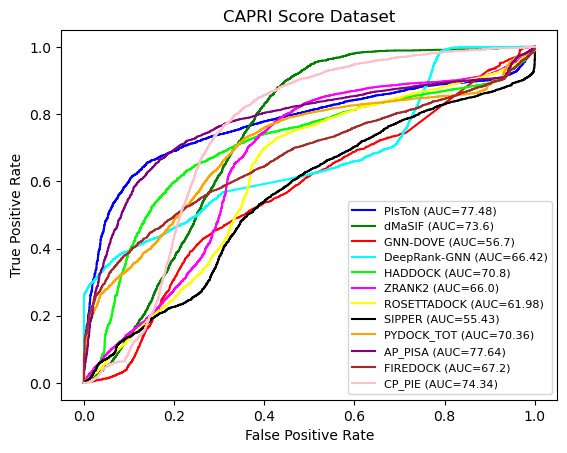

In [3]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_ROC(df, score_name, label_name, model_name, ax, color, pos_label):
    fpr, tpr, thresh = roc_curve(df[label_name], df[score_name], pos_label=pos_label)
    AUC = auc(fpr, tpr)
    ax.plot(fpr, tpr, linestyle='-',color=color, label=f'{model_name} (AUC={int(AUC*10000)/100})')

fig, ax = plt.subplots()
colors = ['blue', 'green', 'red', 'cyan', 'lime', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink']
plot_ROC(CAPRI_scores, 'PIsToN', 'label', 'PIsToN', ax, colors[0], pos_label=0)
plot_ROC(CAPRI_scores, 'dMaSIF', 'label', 'dMaSIF', ax, colors[1], pos_label=1)
plot_ROC(CAPRI_scores, 'GNN-DOVE', 'label', 'GNN-DOVE', ax, colors[2], pos_label=1)
plot_ROC(CAPRI_scores, 'DeepRank-GNN', 'label', 'DeepRank-GNN', ax, colors[3], pos_label=1)
plot_ROC(CAPRI_scores, 'HADDOCK', 'label', 'HADDOCK', ax, colors[4], pos_label=0)
plot_ROC(CAPRI_scores, 'ZRANK2', 'label', 'ZRANK2', ax, colors[5], pos_label=0)
plot_ROC(CAPRI_scores, 'ROSETTADOCK', 'label', 'ROSETTADOCK', ax, colors[6], pos_label=0)
plot_ROC(CAPRI_scores, 'SIPPER', 'label', 'SIPPER', ax, colors[7], pos_label=0)
plot_ROC(CAPRI_scores, 'PYDOCK_TOT', 'label', 'PYDOCK_TOT', ax, colors[8], pos_label=0)
plot_ROC(CAPRI_scores, 'AP_PISA', 'label', 'AP_PISA', ax, colors[9], pos_label=0)
plot_ROC(CAPRI_scores, 'FIREDOCK', 'label', 'FIREDOCK', ax, colors[10], pos_label=0)
plot_ROC(CAPRI_scores, 'CP_PIE', 'label', 'CP_PIE', ax, colors[11], pos_label=1)



# # title
plt.title('CAPRI Score Dataset')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

legend_font_size = 8  
plt.legend(loc='best', prop={'size': legend_font_size})

plt.show();


## Compute Success rate

In [4]:
import numpy as np
df = CAPRI_scores
df['target'] = df['PID']
all_targets = list(df['target'].unique())


def compute_success_rate(method, ascending):
    top1 = 0
    top3 = 0
    top5=0
    top10 = 0
    top25 = 0
    top100= 0
    top200 = 0
    for target in all_targets:
        target_df = df[df['target']==target]
        target_df = target_df.sort_values(by=method, ascending=ascending).reset_index(drop=True)
        if 1 in list(target_df[:1]['label']):
             top1+=1
        if 1 in list(target_df[:3]['label']):
             top3+=1
        if 1 in list(target_df[:5]['label']):
             top5+=1
        if 1 in list(target_df[:10]['label']):
            top10+=1
        if 1 in list(target_df[:25]['label']):
            top25+=1
        if 1 in list(target_df[:100]['label']):
             top100+=1
        if 1 in list(target_df[:200]['label']):
            top200+=1
    all_success_rate = [top1,top3, top5, top10, top25, top100, top200]

    all_success_rate = [int(x*100/len(all_targets)) for x in all_success_rate]
    return all_success_rate


methods = ['PIsToN','DeepRank-GNN', 'GNN-DOVE','dMaSIF', 'HADDOCK', 'AP_PISA','CP_PIE', 'FIREDOCK','PYDOCK_TOT', 'ZRANK2','ROSETTADOCK','SIPPER']
all_scores = []
for method in methods:
    if method=='DeepRank-GNN' or method=='GNN-DOVE' or method=='dMaSIF' or method=='HADDOCK' or method=='FIREDOCK'or method=='AP_PISA'\
        or method=='CP_PIE'or method=='PYDOCK_TOT' or method=='ZRANK2'or method=='ROSETTADOCK'or method=='SIPPER':
        all_scores.append([method]+compute_success_rate(method, False))
    else:
        all_scores.append([method]+compute_success_rate(method, True))

df_top = pd.DataFrame(all_scores, columns=['model','top1','top3', 'top5', 'top10', 'top25', 'top100', 'top200'])
df_top



,model,top1,top3,top5,top10,top25,top100,top200
0,PIsToN,15,30,38,46,69,69,92
1,DeepRank-GNN,84,84,84,84,84,84,84
2,GNN-DOVE,0,0,15,15,30,69,69
3,dMaSIF,23,30,30,46,61,76,84
4,HADDOCK,7,7,23,30,46,61,69
5,AP_PISA,0,0,0,0,7,53,53
6,CP_PIE,15,15,23,46,53,69,76
7,FIREDOCK,0,0,0,0,7,30,46
8,PYDOCK_TOT,0,0,0,0,0,15,46
9,ZRANK2,7,7,30,30,46,69,69


## Compute AP, BA, F1, Precision, Recall

In [5]:
from sklearn.metrics import matthews_corrcoef, f1_score, balanced_accuracy_score, auc, precision_score, average_precision_score, recall_score, precision_recall_curve
import random

all_results = []
all_thresholds = []
all_matthews = []
df = df.dropna()


def find_threshold_one_fold(df, score_name, label_name):
    precision, recall, thresholds = precision_recall_curve(df[label_name], df[score_name])
    max_matthews = 0
    optimal_threshold = 0
    labels = df[label_name]
    for thr in thresholds:
        pred_labels = df[score_name].apply(lambda x: int(x>thr))
        matthews = matthews_corrcoef(labels, pred_labels)
        if matthews>max_matthews:
            max_matthews = matthews
            optimal_threshold = thr
    return optimal_threshold, max_matthews


def find_optimal_threshold(df, score_name, label_name, reverse_sign=True):
    
    df = df.copy()
    if reverse_sign:
        df[score_name] = - df[score_name]

    all_thresholds = []
    all_matthews = []
    shuffled = df.sample(frac=1, random_state=15)
    all_chunks = np.array_split(shuffled, 10)
    labels = df[label_name]
    for cv_df in all_chunks:
        cv_optimal, cv_matthews = find_threshold_one_fold(cv_df, score_name, label_name)
        all_thresholds.append(cv_optimal)
        all_matthews.append(cv_matthews)
        
    optimal_threshold = np.mean(all_thresholds)
    pred_labels = df[score_name].apply(lambda x: int(x>optimal_threshold))
    AP = average_precision_score(df[label_name], pred_labels)
    balanced_accuracy = balanced_accuracy_score(labels, pred_labels)
    f1 = f1_score(labels, pred_labels)
    precision = precision_score(labels, pred_labels)
    recall = recall_score(labels, pred_labels)
    
    if reverse_sign:
        all_thresholds = [-x for x in all_thresholds]
        optimal_threshold = np.mean(all_thresholds)

    print(f"Optimal threshold: {optimal_threshold}; AP= {AP}, BA={balanced_accuracy}, F1={f1}, Precision={precision};  Recall={recall}")
    return all_thresholds, all_matthews, [AP, balanced_accuracy, f1, precision, recall]



for i in range(len(methods)):
    print("")
    print(methods[i])
    thresholds, matthews, metrics = find_optimal_threshold(CAPRI_scores, methods[i], 'label', reverse_sign=True)
    
    all_results.append([methods[i]]+metrics)
    all_thresholds.append([methods[i]]+thresholds)
    all_matthews.append([methods[i]]+matthews)
    
metrics_df = pd.DataFrame(all_results, columns=['Method', 'AP','BA','F1', 'Precision',  'Recall'])
metrics_df


PIsToN
Optimal threshold: 0.0560238122; AP= 0.24363616194460794, BA=0.7558433942595615, F1=0.4035730645900137, Precision=0.2646837914976716;  Recall=0.8491566265060241

DeepRank-GNN
Optimal threshold: 0.0026237465000000003; AP= 0.12406442629074947, BA=0.40461278412512514, F1=0.007609130957148579, Precision=0.006509078451524495;  Recall=0.009156626506024097

GNN-DOVE
Optimal threshold: 0.57916; AP= 0.1310184892783377, BA=0.5255625189485968, F1=0.23116615067079466, Precision=0.13119021279364873;  Recall=0.971566265060241

dMaSIF
Optimal threshold: 2.1785707354; AP= 0.12480451881866315, BA=0.4984140906957717, F1=0.22060633180445244, Precision=0.1247864329557679;  Recall=0.9503614457831325

HADDOCK
Optimal threshold: -89.2532234; AP= 0.20511645372255538, BA=0.6945683042407479, F1=0.3552631578947369, Precision=0.23489203044896692;  Recall=0.7286746987951808

AP_PISA
Optimal threshold: -0.23157; AP= 0.24488602623449895, BA=0.7373774726621065, F1=0.4139711878227779, Precision=0.2882831724399

,Method,AP,BA,F1,Precision,Recall
0,PIsToN,0.243636,0.755843,0.403573,0.264684,0.849157
1,DeepRank-GNN,0.124064,0.404613,0.007609,0.006509,0.009157
2,GNN-DOVE,0.131018,0.525563,0.231166,0.131190,0.971566
3,dMaSIF,0.124805,0.498414,0.220606,0.124786,0.950361
4,HADDOCK,0.205116,0.694568,0.355263,0.234892,0.728675
5,AP_PISA,0.244886,0.737377,0.413971,0.288283,0.733976
6,CP_PIE,0.127722,0.511489,0.225042,0.127898,0.935904
7,FIREDOCK,0.172320,0.648850,0.298159,0.181112,0.842892
8,PYDOCK_TOT,0.206821,0.681236,0.363378,0.257545,0.616867
9,ZRANK2,0.216231,0.671451,0.380730,0.303612,0.510361


# 2. CAPRI-score-Refined dataset

## Obtain scores for all methods 

86 samples are discarded from the dataset, because some methods could not deal with them. 

In [6]:
CAPRI_scores_refined = pd.read_csv('CAPRI-score-Refined_scores&labels.csv')
CAPRI_scores_refined

,PDB,PID,seqid,label,capri_quality,Unnamed: 5,Unnamed: 6,model,nclash,fnat,...,SIPPER,AP_PISA,FIREDOCK,CP_PIE,DeepRank-GNN,GNN-DOVE,dMaSIF,PIsToN,DeepRank,HADDOCK
0,T29_0,T29,90.9,0,4,NaN,NaN,T29_0_conv,95/100,0.00,...,-8.277,0.1809,-34.50,0.885239,0.002169,0.1912,-0.582117,0.245602,2.276690,-66.65310
1,T29_1000,T29,94.5,0,4,NaN,NaN,T29_1000_conv,40/100,0.00,...,5.009,-0.1675,-37.31,0.667385,0.033626,0.2214,-0.051979,0.926115,1.137904,-65.60780
2,T29_1001,T29,90.9,0,4,NaN,NaN,T29_1001_conv,3/100,0.00,...,0.819,-0.0426,-9.56,0.530201,0.005455,0.0960,-0.599100,1.960213,-4.912790,-76.41506
3,T29_1002,T29,90.9,0,4,NaN,NaN,T29_1002_conv,65/100,0.00,...,-9.123,0.1819,-14.46,0.659498,-0.000208,0.5877,-0.499630,1.523465,1.701099,9.46515
4,T29_1003,T29,88.3,0,4,NaN,NaN,T29_1003_conv,2/100,0.00,...,-0.231,-0.0704,-0.67,0.225290,0.013418,0.1148,-0.917829,1.959803,-4.838949,-50.94296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16575,T54_997,T54,100.0,0,4,NaN,NaN,T54_997_conv,38/64,0.00,...,13.121,-0.1900,-52.35,1.249688,0.018442,0.0604,-1.798892,-1.656684,3.011545,-61.96156
16576,T54_998,T54,100.0,0,4,NaN,NaN,T54_998_conv,May-64,0.00,...,2.605,-0.0640,-12.05,0.686969,0.020574,0.0921,-2.228157,1.632490,-1.403444,-70.93820
16577,T54_999,T54,100.0,0,4,NaN,NaN,T54_999_conv,Aug-64,0.00,...,21.385,-0.1737,-54.07,1.466114,0.335369,0.1111,0.376598,0.229003,3.103264,-124.79480
16578,T54_99,T54,100.0,0,4,NaN,NaN,T54_99_conv,May-64,0.00,...,2.031,-0.0758,-40.18,1.040298,0.034720,0.1426,-3.087996,-0.600340,0.850913,-87.61076


## Compute AUC

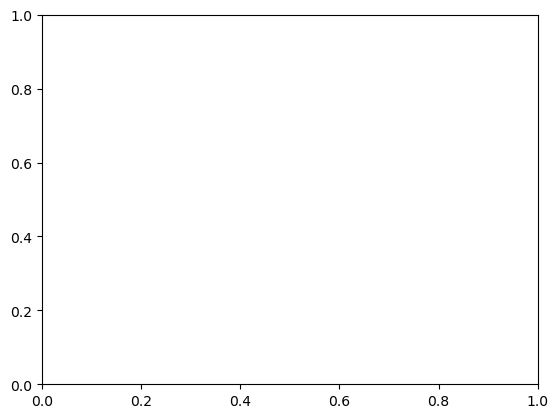

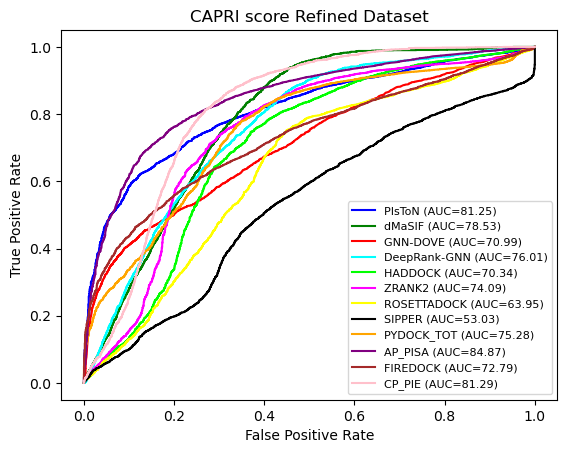

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_ROC(df, score_name, label_name, model_name, ax, color, pos_label):
    fpr, tpr, thresh = roc_curve(df[label_name], df[score_name], pos_label=pos_label)
    AUC = auc(fpr, tpr)
    ax.plot(fpr, tpr, linestyle='-',color=color, label=f'{model_name} (AUC={int(AUC*10000)/100})')

fig, ax = plt.subplots()


fig, ax = plt.subplots()
colors = ['blue', 'green', 'red', 'cyan', 'lime', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink']
plot_ROC(CAPRI_scores_refined, 'PIsToN', 'label', 'PIsToN', ax, colors[0], pos_label=0)
plot_ROC(CAPRI_scores_refined, 'dMaSIF', 'label', 'dMaSIF', ax, colors[1], pos_label=1)
plot_ROC(CAPRI_scores_refined, 'GNN-DOVE', 'label', 'GNN-DOVE', ax, colors[2], pos_label=1)
plot_ROC(CAPRI_scores_refined, 'DeepRank-GNN', 'label', 'DeepRank-GNN', ax, colors[3], pos_label=1)
plot_ROC(CAPRI_scores_refined, 'HADDOCK', 'label', 'HADDOCK', ax, colors[4], pos_label=0)
plot_ROC(CAPRI_scores_refined, 'ZRANK2', 'label', 'ZRANK2', ax, colors[5], pos_label=0)
plot_ROC(CAPRI_scores_refined, 'ROSETTADOCK', 'label', 'ROSETTADOCK', ax, colors[6], pos_label=0)
plot_ROC(CAPRI_scores_refined, 'SIPPER', 'label', 'SIPPER', ax, colors[7], pos_label=0)
plot_ROC(CAPRI_scores_refined, 'PYDOCK_TOT', 'label', 'PYDOCK_TOT', ax, colors[8], pos_label=0)
plot_ROC(CAPRI_scores_refined, 'AP_PISA', 'label', 'AP_PISA', ax, colors[9], pos_label=0)
plot_ROC(CAPRI_scores_refined, 'FIREDOCK', 'label', 'FIREDOCK', ax, colors[10], pos_label=0)
plot_ROC(CAPRI_scores_refined, 'CP_PIE', 'label', 'CP_PIE', ax, colors[11], pos_label=1)

plt.title('CAPRI score Refined Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

legend_font_size = 8  
plt.legend(loc='best', prop={'size': legend_font_size})

plt.show();


## Compute Success rate

In [8]:
import numpy as np
df = CAPRI_scores_refined
df['target'] = df['PID']
all_targets = list(df['target'].unique())


def compute_success_rate(method, ascending):
    top1 = 0
    top3 = 0
    top5=0
    top10 = 0
    top25 = 0
    top100= 0
    top200 = 0
    for target in all_targets:
        target_df = df[df['target']==target]
        target_df = target_df.sort_values(by=method, ascending=ascending).reset_index(drop=True)
        if 1 in list(target_df[:1]['label']):
             top1+=1
        if 1 in list(target_df[:3]['label']):
             top3+=1
        if 1 in list(target_df[:5]['label']):
             top5+=1
        if 1 in list(target_df[:10]['label']):
            top10+=1
        if 1 in list(target_df[:25]['label']):
            top25+=1
        if 1 in list(target_df[:100]['label']):
             top100+=1
        if 1 in list(target_df[:200]['label']):
            top200+=1
    all_success_rate = [top1,top3, top5, top10, top25, top100, top200]

    all_success_rate = [int(x*100/len(all_targets)) for x in all_success_rate]

    return all_success_rate


methods = ['PIsToN','DeepRank-GNN', 'GNN-DOVE','dMaSIF', 'HADDOCK', 'AP_PISA','CP_PIE', 'FIREDOCK','PYDOCK_TOT', 'ZRANK2','ROSETTADOCK','SIPPER']
all_scores = []
for method in methods:
    if method=='DeepRank-GNN' or method=='GNN-DOVE' or method=='dMaSIF' or method== 'HADDOCK' or method=='FIREDOCK'or method=='AP_PISA'\
        or method=='CP_PIE'or method=='PYDOCK_TOT' or method=='ZRANK2'or method=='ROSETTADOCK'or method=='SIPPER':
        all_scores.append([method]+compute_success_rate(method, False))
    else:
        all_scores.append([method]+compute_success_rate(method, True))

df_top = pd.DataFrame(all_scores, columns=['model','top1','top3', 'top5', 'top10', 'top25', 'top100', 'top200'])
df_top


,model,top1,top3,top5,top10,top25,top100,top200
0,PIsToN,38,38,46,69,76,76,100
1,DeepRank-GNN,23,46,46,46,53,69,84
2,GNN-DOVE,15,30,53,61,69,76,100
3,dMaSIF,15,15,30,38,53,76,92
4,HADDOCK,7,15,23,23,53,69,76
5,AP_PISA,0,0,0,0,7,46,53
6,CP_PIE,23,23,30,46,69,69,84
7,FIREDOCK,0,0,0,0,7,23,46
8,PYDOCK_TOT,0,0,0,0,0,7,30
9,ZRANK2,7,7,15,38,53,61,61


## Compute AP, BA, F1, Precision, Recall

In [9]:
from sklearn.metrics import matthews_corrcoef, f1_score, balanced_accuracy_score, auc, precision_score, average_precision_score, recall_score, precision_recall_curve
import random

all_results = []
all_thresholds = []
all_matthews = []
df = df.dropna()


def find_threshold_one_fold(df, score_name, label_name):
    precision, recall, thresholds = precision_recall_curve(df[label_name], df[score_name])
    max_matthews = 0
    optimal_threshold = 0
    labels = df[label_name]
    for thr in thresholds:
        pred_labels = df[score_name].apply(lambda x: int(x>thr))
        matthews = matthews_corrcoef(labels, pred_labels)
        if matthews>max_matthews:
            max_matthews = matthews
            optimal_threshold = thr
    return optimal_threshold, max_matthews


def find_optimal_threshold(df, score_name, label_name, reverse_sign=True):
    
    df = df.copy()
    if reverse_sign:
        df[score_name] = - df[score_name]

    all_thresholds = []
    all_matthews = []
    shuffled = df.sample(frac=1, random_state=15)
    all_chunks = np.array_split(shuffled, 10)
    labels = df[label_name]
    for cv_df in all_chunks:
        cv_optimal, cv_matthews = find_threshold_one_fold(cv_df, score_name, label_name)
        all_thresholds.append(cv_optimal)
        all_matthews.append(cv_matthews)
        
    optimal_threshold = np.mean(all_thresholds)
    pred_labels = df[score_name].apply(lambda x: int(x>optimal_threshold))
    AP = average_precision_score(df[label_name], pred_labels)
    balanced_accuracy = balanced_accuracy_score(labels, pred_labels)
    f1 = f1_score(labels, pred_labels)
    precision = precision_score(labels, pred_labels)
    recall = recall_score(labels, pred_labels)
    
    if reverse_sign:
        all_thresholds = [-x for x in all_thresholds]
        optimal_threshold = np.mean(all_thresholds)

    print(f"Optimal threshold: {optimal_threshold}; AP= {AP}, BA={balanced_accuracy}, F1={f1}, Precision={precision};  Recall={recall}")
    return all_thresholds, all_matthews, [AP, balanced_accuracy, f1, precision, recall]



for i in range(len(methods)):
    print("")
    print(methods[i])
    thresholds, matthews, metrics = find_optimal_threshold(CAPRI_scores_refined, methods[i], 'label', reverse_sign=True)
    
    all_results.append([methods[i]]+metrics)
    all_thresholds.append([methods[i]]+thresholds)
    all_matthews.append([methods[i]]+matthews)
    
metrics_df = pd.DataFrame(all_results, columns=['Method','AP', 'BA','F1', 'Precision', 'Recall'])

metrics_df


PIsToN
Optimal threshold: -0.48126129510000004; AP= 0.24863195981890301, BA=0.7323739632781384, F1=0.42205882352941176, Precision=0.3037037037037037;  Recall=0.691566265060241

DeepRank-GNN
Optimal threshold: 0.8837361693; AP= 0.1253097915141058, BA=0.5007252173118534, F1=0.2226642296527255, Precision=0.12531009862648998;  Recall=0.9980722891566265

GNN-DOVE
Optimal threshold: 0.25833999999999996; AP= 0.10353346502957916, BA=0.348983939896089, F1=0.1405677033817737, Precision=0.0818117144889732;  Recall=0.4987951807228916

dMaSIF
Optimal threshold: 1.8801354170000004; AP= 0.12329578159868414, BA=0.4913982299414826, F1=0.21888666918632904, Precision=0.12325185455429892;  Recall=0.9768674698795181

HADDOCK
Optimal threshold: -121.832329; AP= 0.21589130247488503, BA=0.6605937296237692, F1=0.379056340832172, Precision=0.3229308005427408;  Recall=0.45879518072289155

AP_PISA
Optimal threshold: -0.26011999999999996; AP= 0.3017750768368718, BA=0.7536041165696914, F1=0.4929344833914479, Preci

,Method,AP,BA,F1,Precision,Recall
0,PIsToN,0.248632,0.732374,0.422059,0.303704,0.691566
1,DeepRank-GNN,0.125310,0.500725,0.222664,0.125310,0.998072
2,GNN-DOVE,0.103533,0.348984,0.140568,0.081812,0.498795
3,dMaSIF,0.123296,0.491398,0.218887,0.123252,0.976867
4,HADDOCK,0.215891,0.660594,0.379056,0.322931,0.458795
5,AP_PISA,0.301775,0.753604,0.492934,0.398044,0.647229
6,CP_PIE,0.123114,0.490540,0.218442,0.123054,0.971566
7,FIREDOCK,0.190003,0.675044,0.330147,0.211745,0.748916
8,PYDOCK_TOT,0.250354,0.704854,0.429816,0.349307,0.558554
9,ZRANK2,0.256807,0.695652,0.437565,0.384587,0.507470


# 3. 19 Complexes from BM4 dataset

## Obtain scores for all methods 

19 samples are discarded from the dataset, because some methods could not deal with them. 

In [10]:
BM4_scores = pd.read_csv('BM4_scores&labels.csv')

BM4_scores

,PDB,IRMSD,PID,label,HADDOCK,PIsToN,dMaSIF,DeepRank-GNN,GNN-DOVE,ZRANK2,ROSETTADOCK,PYDOCK_TOT,SIPPER,AP_PISA,FIREDOCK,CP_PIE
0,1AK4_1,10.03,1AK4,1,37.488700,-0.033544,-0.640728,0.011799,0.2297,1190.660,412.325,-5.720,6.461,0.1388,-83.55,1.119050
1,1AK4_2,15.26,1AK4,0,202.445917,1.835548,-0.286034,0.364610,0.2421,923.635,393.761,8.142,2.375,-0.1207,-47.55,1.017677
2,1AK4_3,9.91,1AK4,1,63.471480,-1.310161,0.200937,0.196858,0.2274,1526.580,503.974,8.213,4.510,0.2361,-86.81,1.044604
3,1AK4_4,15.42,1AK4,0,60.889980,1.234358,-0.168776,0.270681,0.2312,793.486,338.348,12.110,2.103,-0.0615,-45.10,0.950572
4,1AK4_5,10.11,1AK4,1,49.479380,-1.494605,0.058527,0.294203,0.2274,1291.650,395.861,-2.490,5.412,0.1077,-88.41,1.008095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,1JTG_396,14.79,1JTG,0,-84.255040,1.545456,0.309353,0.010280,0.2919,736.785,293.253,-10.375,12.141,0.0652,-44.32,1.117310
7596,1JTG_397,13.25,1JTG,0,-107.722100,-0.978067,0.166507,0.010280,0.6826,4958.070,309.925,-13.811,14.707,0.0670,-152.08,1.059573
7597,1JTG_398,17.04,1JTG,0,-88.133800,0.036386,0.416821,0.000290,0.6621,1015.450,286.480,-10.042,15.675,-0.1287,-120.30,1.913099
7598,1JTG_399,19.19,1JTG,0,-95.652400,0.030230,-0.141852,0.000290,0.5673,881.060,185.071,-17.924,15.268,-0.1047,-96.62,1.423075


## Compute AUC

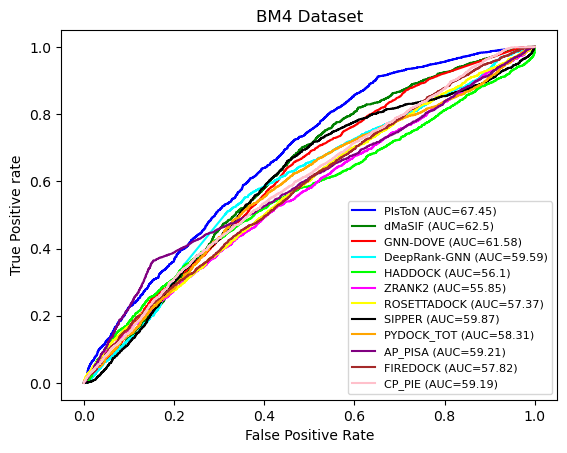

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_ROC(df, score_name, label_name, model_name, ax, color, pos_label):
    fpr, tpr, thresh = roc_curve(df[label_name], df[score_name], pos_label=pos_label)
    AUC = auc(fpr, tpr)
    ax.plot(fpr, tpr, linestyle='-',color=color, label=f'{model_name} (AUC={int(AUC*10000)/100})')


fig, ax = plt.subplots()
colors = ['blue', 'green', 'red', 'cyan', 'lime', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink']
plot_ROC(BM4_scores, 'PIsToN', 'label', 'PIsToN', ax, colors[0], pos_label=0)
plot_ROC(BM4_scores, 'dMaSIF', 'label', 'dMaSIF', ax, colors[1], pos_label=1)
plot_ROC(BM4_scores, 'GNN-DOVE', 'label', 'GNN-DOVE', ax, colors[2], pos_label=1)
plot_ROC(BM4_scores, 'DeepRank-GNN', 'label', 'DeepRank-GNN', ax, colors[3], pos_label=1)
plot_ROC(BM4_scores, 'HADDOCK', 'label', 'HADDOCK', ax, colors[4], pos_label=1)
plot_ROC(BM4_scores, 'ZRANK2', 'label', 'ZRANK2', ax, colors[5], pos_label=1)
plot_ROC(BM4_scores, 'ROSETTADOCK', 'label', 'ROSETTADOCK', ax, colors[6], pos_label=1)
plot_ROC(BM4_scores, 'SIPPER', 'label', 'SIPPER', ax, colors[7], pos_label=1)
plot_ROC(BM4_scores, 'PYDOCK_TOT', 'label', 'PYDOCK_TOT', ax, colors[8], pos_label=0)
plot_ROC(BM4_scores, 'AP_PISA', 'label', 'AP_PISA', ax, colors[9], pos_label=1)
plot_ROC(BM4_scores, 'FIREDOCK', 'label', 'FIREDOCK', ax, colors[10], pos_label=0)
plot_ROC(BM4_scores, 'CP_PIE', 'label', 'CP_PIE', ax, colors[11], pos_label=1)


plt.title('BM4 Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

legend_font_size = 8  
plt.legend(loc='best', prop={'size': legend_font_size})

plt.show();


## Compute Success rate

In [12]:
import numpy as np
df = BM4_scores
df['target'] = df['PID']
all_targets = list(df['target'].unique())


def compute_success_rate(method, ascending):
    top1 = 0
    top3 = 0
    top5=0
    top10 = 0
    top25 = 0
    top100= 0
    top200 = 0
    for target in all_targets:
        target_df = df[df['target']==target]
        target_df = target_df.sort_values(by=method, ascending=ascending).reset_index(drop=True)
        if 1 in list(target_df[:1]['label']):
             top1+=1
        if 1 in list(target_df[:3]['label']):
             top3+=1
        if 1 in list(target_df[:5]['label']):
             top5+=1
        if 1 in list(target_df[:10]['label']):
            top10+=1
        if 1 in list(target_df[:25]['label']):
            top25+=1
        if 1 in list(target_df[:100]['label']):
             top100+=1
        if 1 in list(target_df[:200]['label']):
            top200+=1
    all_success_rate = [top1,top3, top5, top10, top25, top100, top200]

    all_success_rate = [int(x*100/len(all_targets)) for x in all_success_rate]
    return all_success_rate


methods = ['PIsToN','DeepRank-GNN', 'GNN-DOVE','dMaSIF', 'HADDOCK' ,'AP_PISA','CP_PIE', 'FIREDOCK','PYDOCK_TOT', 'ZRANK2','ROSETTADOCK','SIPPER']

all_scores = []
for method in methods:
    if method=='DeepRank-GNN' or method=='GNN-DOVE' or method=='dMaSIF' or method=='HADDOCK' or method=='FIREDOCK'or method=='AP_PISA'\
        or method=='CP_PIE'or method=='PYDOCK_TOT' or method=='ZRANK2'or method=='ROSETTADOCK'or method=='SIPPER':
        all_scores.append([method]+compute_success_rate(method, False))
    else:
        all_scores.append([method]+compute_success_rate(method, True))

df_top = pd.DataFrame(all_scores, columns=['model','top1','top3', 'top5', 'top10', 'top25', 'top100', 'top200'])
df_top


,model,top1,top3,top5,top10,top25,top100,top200
0,PIsToN,68,84,89,89,89,94,100
1,DeepRank-GNN,21,47,57,73,73,89,94
2,GNN-DOVE,21,47,63,68,84,100,100
3,dMaSIF,47,47,52,68,89,94,100
4,HADDOCK,26,52,63,89,94,94,100
5,AP_PISA,26,63,68,78,89,94,94
6,CP_PIE,52,63,73,78,84,100,100
7,FIREDOCK,26,63,68,84,89,89,94
8,PYDOCK_TOT,15,36,42,63,84,94,94
9,ZRANK2,42,57,57,78,89,94,94


## Compute AP, BA, F1, Precision, Recall

In [13]:
from sklearn.metrics import matthews_corrcoef, f1_score, balanced_accuracy_score, auc, precision_score, average_precision_score, recall_score, precision_recall_curve
import random

all_results = []
all_thresholds = []
all_matthews = []
df = df.dropna()


def find_threshold_one_fold(df, score_name, label_name):
    precision, recall, thresholds = precision_recall_curve(df[label_name], df[score_name])
    max_matthews = 0
    optimal_threshold = 0
    labels = df[label_name]
    for thr in thresholds:
        pred_labels = df[score_name].apply(lambda x: int(x>thr))
        matthews = matthews_corrcoef(labels, pred_labels)
        if matthews>max_matthews:
            max_matthews = matthews
            optimal_threshold = thr
    return optimal_threshold, max_matthews


def find_optimal_threshold(df, score_name, label_name, reverse_sign=True):
    
    df = df.copy()
    if reverse_sign:
        df[score_name] = - df[score_name]

    all_thresholds = []
    all_matthews = []
    shuffled = df.sample(frac=1, random_state=15)
    all_chunks = np.array_split(shuffled, 10)
    labels = df[label_name]
    for cv_df in all_chunks:
        cv_optimal, cv_matthews = find_threshold_one_fold(cv_df, score_name, label_name)
        all_thresholds.append(cv_optimal)
        all_matthews.append(cv_matthews)
        
    optimal_threshold = np.mean(all_thresholds)
    pred_labels = df[score_name].apply(lambda x: int(x>optimal_threshold))
    AP = average_precision_score(df[label_name], pred_labels)
    balanced_accuracy = balanced_accuracy_score(labels, pred_labels)
    f1 = f1_score(labels, pred_labels)
    precision = precision_score(labels, pred_labels)
    recall = recall_score(labels, pred_labels)
    
    if reverse_sign:
        all_thresholds = [-x for x in all_thresholds]
        optimal_threshold = np.mean(all_thresholds)

    print(f"Optimal threshold: {optimal_threshold}; AP= {AP}, BA={balanced_accuracy}, F1={f1}, Precision={precision};  Recall={recall}")
    return all_thresholds, all_matthews, [AP, balanced_accuracy, f1, precision,  recall]



for i in range(len(methods)):
    print("")
    print(methods[i])
    thresholds, matthews, metrics = find_optimal_threshold(BM4_scores, methods[i], 'label', reverse_sign=True)
    
    all_results.append([methods[i]]+metrics)
    all_thresholds.append([methods[i]]+thresholds)
    all_matthews.append([methods[i]]+matthews)
    
metrics_df = pd.DataFrame(all_results, columns=['Method','AP', 'BA','F1', 'Precision', 'Recall'])

metrics_df


PIsToN
Optimal threshold: 0.009157407499999997; AP= 0.3646227718357391, BA=0.6270891144359662, F1=0.4366863905325444, Precision=0.5375091041514931;  Recall=0.36771300448430494

DeepRank-GNN
Optimal threshold: 0.1929492667; AP= 0.2640649245844545, BA=0.4999639203071745, F1=0.41581010914485533, Precision=0.26406460296096906;  Recall=0.9775784753363229

GNN-DOVE
Optimal threshold: 0.6364799999999999; AP= 0.2511704093910846, BA=0.46466626595936217, F1=0.38038667598416026, Precision=0.2482140142878857;  Recall=0.8136522172396612

dMaSIF
Optimal threshold: 0.9781032324; AP= 0.2626927027334155, BA=0.4964143021327731, F1=0.41443147154728094, Precision=0.26266666666666666;  Recall=0.9815645241654211

HADDOCK
Optimal threshold: 354281.505519; AP= 0.2645681222322881, BA=0.5012561969099569, F1=0.4176031929419178, Precision=0.26457279744476975;  Recall=0.9905331340308918

AP_PISA
Optimal threshold: 0.16692; AP= 0.2536463335271057, BA=0.4719229612145084, F1=0.3940487911607045, Precision=0.252453041

,Method,AP,BA,F1,Precision,Recall
0,PIsToN,0.364623,0.627089,0.436686,0.537509,0.367713
1,DeepRank-GNN,0.264065,0.499964,0.415810,0.264065,0.977578
2,GNN-DOVE,0.251170,0.464666,0.380387,0.248214,0.813652
3,dMaSIF,0.262693,0.496414,0.414431,0.262667,0.981565
4,HADDOCK,0.264568,0.501256,0.417603,0.264573,0.990533
5,AP_PISA,0.253646,0.471923,0.394049,0.252453,0.897359
6,CP_PIE,0.242309,0.433676,0.313957,0.223014,0.530144
7,FIREDOCK,0.285855,0.542845,0.301823,0.345315,0.268062
8,PYDOCK_TOT,0.301648,0.577120,0.416482,0.330984,0.561535
9,ZRANK2,0.249738,0.459732,0.352384,0.241956,0.648231


# 4. 15 Complexes from BM5 dataset

## Obtain scores for all methods 

In [14]:
BM5_scores = pd.read_csv('BM5_scores&labels.csv')
BM5_scores 

,PDB,label,DOCKQ,FNAT,IRMSD,LRMSD,CAPRI_quality,PID,HADDOCK,ZRANK2,ROSETTADOCK,PYDOCK_TOT,SIPPER,AP_PISA,FIREDOCK,CP_PIE,dMaSIF,PIsToN,GNN-DOVE,DeepRank-GNN
0,1PPE-ti5-it0-811,1,0.496,0.357,2.010,4.586,3,1PPE,-47.20782,-112.4460,7.205,-8.403,4.107,-0.1588,-36.52,0.929373,0.731448,0.882982,0.0767,0.471367
1,1PPE-ti5-it0-526,1,0.487,0.314,1.982,4.497,2,1PPE,-44.53882,-90.2878,10.283,-6.020,4.976,-0.1588,-33.64,0.883153,0.697595,0.981985,0.0806,0.440825
2,1PPE-ti-it0-896,1,0.534,0.429,1.879,4.460,2,1PPE,-53.11126,-102.0200,5.730,-8.775,3.657,-0.1987,-44.05,0.937792,0.505799,0.445700,0.1575,0.553172
3,1PPE-ti-it0-261,1,0.534,0.429,1.879,4.460,2,1PPE,-51.88226,-102.3620,5.722,-8.773,3.657,-0.1998,-44.09,0.937802,0.598168,0.512893,0.1570,0.553203
4,1PPE-ti5-it1-364,1,0.862,0.843,0.802,1.626,1,1PPE,-118.92988,-251.4160,-7.343,-16.480,8.543,-0.4595,-81.45,1.482719,0.674827,-1.393844,0.0939,0.692241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,3K75-cm-it0-8220,0,0.006,0.000,27.454,65.950,4,3K75,-42.97320,-38.1305,-1.623,10.545,-1.381,0.0229,13.52,0.250287,-0.229875,1.955641,0.0575,0.010833
7496,3K75-cm-it0-3219,0,0.008,0.000,19.494,63.952,4,3K75,-74.49260,-156.2390,-1.700,-7.818,-4.365,-0.2040,11.31,0.836375,-1.133868,1.937942,0.0939,0.015290
7497,3K75-cm-it0-7629,0,0.010,0.000,17.704,55.071,4,3K75,-43.98177,-72.2320,-1.456,-8.609,-0.792,-0.1039,7.62,0.320556,-0.239974,1.952738,0.2431,0.006970
7498,3K75-ranair-it0-7387,0,0.045,0.000,14.578,22.405,4,3K75,-50.99562,-66.6124,1.655,-5.274,-0.467,0.0608,-12.17,0.372584,-1.306894,1.924920,0.1149,0.013207


## Compute AUC

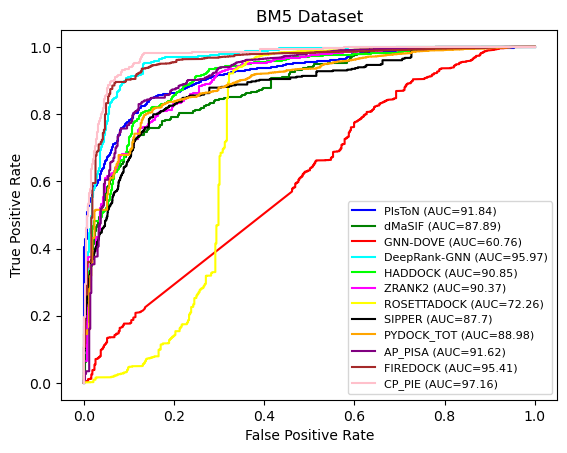

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_ROC(df, score_name, label_name, model_name, ax, color, pos_label):
    fpr, tpr, thresh = roc_curve(df[label_name], df[score_name], pos_label=pos_label)
    AUC = auc(fpr, tpr)
    ax.plot(fpr, tpr, linestyle='-',color=color, label=f'{model_name} (AUC={int(AUC*10000)/100})')


fig, ax = plt.subplots()
colors = ['blue', 'green', 'red', 'cyan', 'lime', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink']
plot_ROC(BM5_scores, 'PIsToN', 'label', 'PIsToN', ax, colors[0], pos_label=0)
plot_ROC(BM5_scores, 'dMaSIF', 'label', 'dMaSIF', ax, colors[1], pos_label=1)
plot_ROC(BM5_scores, 'GNN-DOVE', 'label', 'GNN-DOVE', ax, colors[2], pos_label=0)
plot_ROC(BM5_scores, 'DeepRank-GNN', 'label', 'DeepRank-GNN', ax, colors[3], pos_label=1)
plot_ROC(BM5_scores, 'HADDOCK', 'label', 'HADDOCK', ax, colors[4], pos_label=0)
plot_ROC(BM5_scores, 'ZRANK2', 'label', 'ZRANK2', ax, colors[5], pos_label=0)
plot_ROC(BM5_scores, 'ROSETTADOCK', 'label', 'ROSETTADOCK', ax, colors[6], pos_label=0)
plot_ROC(BM5_scores, 'SIPPER', 'label', 'SIPPER', ax, colors[7], pos_label=1)
plot_ROC(BM5_scores, 'PYDOCK_TOT', 'label', 'PYDOCK_TOT', ax, colors[8], pos_label=0)
plot_ROC(BM5_scores, 'AP_PISA', 'label', 'AP_PISA', ax, colors[9], pos_label=0)
plot_ROC(BM5_scores, 'FIREDOCK', 'label', 'FIREDOCK', ax, colors[10], pos_label=0)
plot_ROC(BM5_scores, 'CP_PIE', 'label', 'CP_PIE', ax, colors[11], pos_label=1)


plt.title('BM5 Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

legend_font_size = 8  
plt.legend(loc='best', prop={'size': legend_font_size})

plt.show();

## Compute Success rate


In [16]:
import numpy as np
df = BM5_scores
df['target'] = df['PID']
all_targets = list(df['target'].unique())


def compute_success_rate(method, ascending):
    top1 = 0
    top3 = 0
    top5=0
    top10 = 0
    top25 = 0
    top100= 0
    top200 = 0
    for target in all_targets:
        target_df = df[df['target']==target]
        target_df = target_df.sort_values(by=method, ascending=ascending).reset_index(drop=True)
        if 1 in list(target_df[:1]['label']):
             top1+=1
        if 1 in list(target_df[:3]['label']):
             top3+=1
        if 1 in list(target_df[:5]['label']):
             top5+=1
        if 1 in list(target_df[:10]['label']):
            top10+=1
        if 1 in list(target_df[:25]['label']):
            top25+=1
        if 1 in list(target_df[:100]['label']):
             top100+=1
        if 1 in list(target_df[:200]['label']):
            top200+=1
    all_success_rate = [top1,top3, top5, top10, top25, top100, top200]

    all_success_rate = [int(x*100/len(all_targets)) for x in all_success_rate]

    return all_success_rate


methods = ['PIsToN','DeepRank-GNN', 'GNN-DOVE','dMaSIF', 'HADDOCK', 'AP_PISA','CP_PIE', 'FIREDOCK','PYDOCK_TOT', 'ZRANK2','ROSETTADOCK','SIPPER']
all_scores = []
for method in methods:
    if method=='DeepRank-GNN' or method=='GNN-DOVE' or method=='dMaSIF' or method=='HADDOCK' or method=='FIREDOCK'or method=='AP_PISA'\
        or method=='CP_PIE'or method=='PYDOCK_TOT' or method=='ZRANK2'or method=='ROSETTADOCK'or method=='SIPPER':
        all_scores.append([method]+compute_success_rate(method, False))
    else:
        all_scores.append([method]+compute_success_rate(method, True))

df_top = pd.DataFrame(all_scores, columns=['model','top1','top3', 'top5', 'top10', 'top25', 'top100', 'top200'])
df_top


,model,top1,top3,top5,top10,top25,top100,top200
0,PIsToN,66,80,86,93,100,100,100
1,DeepRank-GNN,93,93,93,100,100,100,100
2,GNN-DOVE,6,13,13,26,33,53,73
3,dMaSIF,40,60,66,80,100,100,100
4,HADDOCK,0,0,0,0,0,6,26
5,AP_PISA,0,0,0,6,6,13,26
6,CP_PIE,93,93,93,100,100,100,100
7,FIREDOCK,0,0,0,0,0,6,13
8,PYDOCK_TOT,0,0,0,0,0,6,6
9,ZRANK2,0,0,0,0,6,6,20


## Compute AP, BA, F1, Precision, Recall

In [17]:
from sklearn.metrics import matthews_corrcoef, f1_score, balanced_accuracy_score, auc, precision_score, average_precision_score, recall_score, precision_recall_curve
import random

all_results = []
all_thresholds = []
all_matthews = []
df = df.dropna()


def find_threshold_one_fold(df, score_name, label_name):
    precision, recall, thresholds = precision_recall_curve(df[label_name], df[score_name])
    max_matthews = 0
    optimal_threshold = 0
    labels = df[label_name]
    for thr in thresholds:
        pred_labels = df[score_name].apply(lambda x: int(x>thr))
        matthews = matthews_corrcoef(labels, pred_labels)
        if matthews>max_matthews:
            max_matthews = matthews
            optimal_threshold = thr
    return optimal_threshold, max_matthews


def find_optimal_threshold(df, score_name, label_name, reverse_sign=True):
    
    df = df.copy()
    if reverse_sign:
        df[score_name] = - df[score_name]

    all_thresholds = []
    all_matthews = []
    shuffled = df.sample(frac=1, random_state=15)
    all_chunks = np.array_split(shuffled, 10)
    labels = df[label_name]
    for cv_df in all_chunks:
        cv_optimal, cv_matthews = find_threshold_one_fold(cv_df, score_name, label_name)
        all_thresholds.append(cv_optimal)
        all_matthews.append(cv_matthews)
        
    optimal_threshold = np.mean(all_thresholds)
    pred_labels = df[score_name].apply(lambda x: int(x>optimal_threshold))
    AP = average_precision_score(df[label_name], pred_labels)
    balanced_accuracy = balanced_accuracy_score(labels, pred_labels)
    f1 = f1_score(labels, pred_labels)
    precision = precision_score(labels, pred_labels)
    
    recall = recall_score(labels, pred_labels)
    
    if reverse_sign:
        all_thresholds = [-x for x in all_thresholds]
        optimal_threshold = np.mean(all_thresholds)

    print(f"Optimal threshold: {optimal_threshold}; AP= {AP}, BA={balanced_accuracy}, F1={f1}, Precision={precision};  Recall={recall}")
    return all_thresholds, all_matthews, [AP, balanced_accuracy, f1, precision, recall]



for i in range(len(methods)):
    print("")
    print(methods[i])
    thresholds, matthews, metrics = find_optimal_threshold(BM5_scores, methods[i], 'label', reverse_sign=True)
    
    all_results.append([methods[i]]+metrics)
    all_thresholds.append([methods[i]]+thresholds)
    all_matthews.append([methods[i]]+matthews)
    
metrics_df = pd.DataFrame(all_results, columns=['Method','AP', 'BA','F1', 'Precision', 'Recall'])

metrics_df


PIsToN
Optimal threshold: 0.139635241; AP= 0.2364374717070369, BA=0.7490706154261522, F1=0.4514285714285714, Precision=0.38164251207729466;  Recall=0.5524475524475524

DeepRank-GNN
Optimal threshold: 0.0; AP= 0.0572, BA=0.49660585490029696, F1=0.0, Precision=0.0;  Recall=0.0

GNN-DOVE
Optimal threshold: 0.05571; AP= 0.09009220409220409, BA=0.5369400080897747, F1=0.13572854291417163, Precision=0.4722222222222222;  Recall=0.07925407925407925

dMaSIF
Optimal threshold: 0.7843331098; AP= 0.04386225919370074, BA=0.27235690345575797, F1=0.05857964424234319, Precision=0.031072644721906923;  Recall=0.5104895104895105

HADDOCK
Optimal threshold: -75.88781589999999; AP= 0.29911494431494434, BA=0.7886660080126351, F1=0.5193798449612403, Precision=0.4444444444444444;  Recall=0.6247086247086248

AP_PISA
Optimal threshold: -0.24339; AP= 0.33450336509128453, BA=0.7224618826231045, F1=0.5419532324621734, Precision=0.6610738255033557;  Recall=0.4592074592074592

CP_PIE
Optimal threshold: 0.0; AP= 0.05

,Method,AP,BA,F1,Precision,Recall
0,PIsToN,0.236437,0.749071,0.451429,0.381643,0.552448
1,DeepRank-GNN,0.057200,0.496606,0.000000,0.000000,0.000000
2,GNN-DOVE,0.090092,0.536940,0.135729,0.472222,0.079254
3,dMaSIF,0.043862,0.272357,0.058580,0.031073,0.510490
4,HADDOCK,0.299115,0.788666,0.519380,0.444444,0.624709
5,AP_PISA,0.334503,0.722462,0.541953,0.661074,0.459207
6,CP_PIE,0.057200,0.493707,0.000000,0.000000,0.000000
7,FIREDOCK,0.431196,0.850091,0.639594,0.566547,0.734266
8,PYDOCK_TOT,0.196136,0.670536,0.398996,0.432065,0.370629
9,ZRANK2,0.292029,0.709992,0.504021,0.593060,0.438228


# 5. DockGround dataset

## Obtain scores for all methods 

505 samples are discarded from the dataset, because some methods could not deal with them. 

In [18]:
Dockground_scores = pd.read_csv('Dockground_scores&labels.csv')
Dockground_scores

,PDB,Input,PID,label,HADDOCK,ZRANK2,ROSETTADOCK,PYDOCK_TOT,SIPPER,AP_PISA,FIREDOCK,CP_PIE,GNN-DOVE,DeepRank-GNN,dMaSIF,PIsToN
0,1a2k_10,r-l_10,1a2k,0,-147.237900,810.218,305.915,-5.733,0.776,0.1010,-70.15,1.157944,0.2399,0.006008,-0.910116,-0.484626
1,1a2k_100,r-l_100,1a2k,0,-83.022792,1959.910,653.466,-3.954,-5.977,0.1316,-75.83,0.219083,0.2411,0.005241,-2.072984,0.504317
2,1a2k_11,r-l_11,1a2k,0,-29.369800,1165.860,383.159,13.802,-2.556,0.2646,-77.27,0.378240,0.2403,0.010280,-0.676388,1.839564
3,1a2k_12,r-l_12,1a2k,0,-135.983100,532.372,276.490,-12.443,-2.255,-0.0671,-53.32,0.995181,0.2389,0.005339,-1.236732,1.217208
4,1a2k_13,r-l_13,1a2k,0,-163.709540,386.203,151.127,-12.838,-0.542,-0.0871,-49.05,0.853365,0.2397,0.000833,-0.385887,-1.269316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6215,3fap_95,r-l_95,3fap,0,14.742390,181.717,160.342,-8.200,3.267,0.1097,-64.67,1.111177,0.5311,0.010280,0.255277,0.013522
6216,3fap_96,r-l_96,3fap,0,-15.646482,226.866,149.638,-20.018,3.906,0.0076,-56.71,0.858180,0.5671,0.007940,-1.752618,0.016194
6217,3fap_97,r-l_97,3fap,0,-12.922290,195.736,190.980,-4.671,0.721,-0.0498,-65.84,0.782534,0.9820,0.010280,-1.497428,0.861207
6218,3fap_98,r-l_98,3fap,0,23.679650,803.650,283.004,4.801,3.450,0.0323,-13.58,0.796997,0.0117,0.003386,-1.349324,1.289806


## Compute AUC

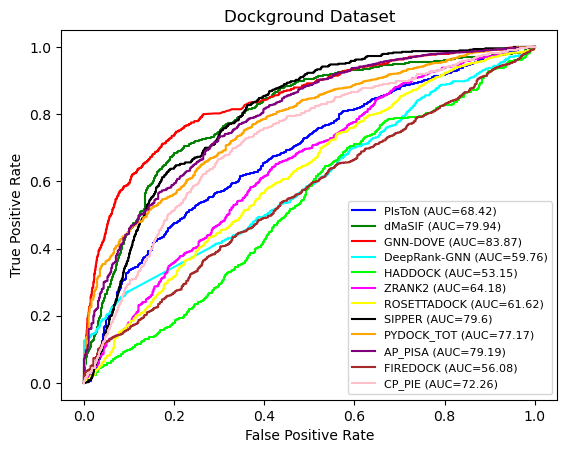

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_ROC(df, score_name, label_name, model_name, ax, color, pos_label):
    fpr, tpr, thresh = roc_curve(df[label_name], df[score_name], pos_label=pos_label)
    AUC = auc(fpr, tpr)
    ax.plot(fpr, tpr, linestyle='-',color=color, label=f'{model_name} (AUC={int(AUC*10000)/100})')


fig, ax = plt.subplots()
colors = ['blue', 'green', 'red', 'cyan', 'lime', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink']
plot_ROC(Dockground_scores, 'PIsToN', 'label', 'PIsToN', ax, colors[0], pos_label=0)
plot_ROC(Dockground_scores, 'dMaSIF', 'label', 'dMaSIF', ax, colors[1], pos_label=1)
plot_ROC(Dockground_scores, 'GNN-DOVE', 'label', 'GNN-DOVE', ax, colors[2], pos_label=1)
plot_ROC(Dockground_scores, 'DeepRank-GNN', 'label', 'DeepRank-GNN', ax, colors[3], pos_label=1)
plot_ROC(Dockground_scores, 'HADDOCK', 'label', 'HADDOCK', ax, colors[4], pos_label=1)
plot_ROC(Dockground_scores, 'ZRANK2', 'label', 'ZRANK2', ax, colors[5], pos_label=0)
plot_ROC(Dockground_scores, 'ROSETTADOCK', 'label', 'ROSETTADOCK', ax, colors[6], pos_label=0)
plot_ROC(Dockground_scores, 'SIPPER', 'label', 'SIPPER', ax, colors[7], pos_label=1)
plot_ROC(Dockground_scores, 'PYDOCK_TOT', 'label', 'PYDOCK_TOT', ax, colors[8], pos_label=0)
plot_ROC(Dockground_scores, 'AP_PISA', 'label', 'AP_PISA', ax, colors[9], pos_label=0)
plot_ROC(Dockground_scores, 'FIREDOCK', 'label', 'FIREDOCK', ax, colors[10], pos_label=0)
plot_ROC(Dockground_scores, 'CP_PIE', 'label', 'CP_PIE', ax, colors[11], pos_label=1)

plt.title('Dockground Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

legend_font_size = 8  
plt.legend(loc='best', prop={'size': legend_font_size})

plt.show();

## Compute Success rate

In [20]:
import numpy as np
df = Dockground_scores
df['target'] = df['PID']
all_targets = list(df['target'].unique())


def compute_success_rate(method, ascending):
    top1 = 0
    top3 = 0
    top5=0
    top10 = 0
    top25 = 0
    top100= 0
    top200 = 0
    for target in all_targets:
        target_df = df[df['target']==target]
        target_df = target_df.sort_values(by=method, ascending=ascending).reset_index(drop=True)
        if 1 in list(target_df[:1]['label']):
             top1+=1
        if 1 in list(target_df[:3]['label']):
             top3+=1
        if 1 in list(target_df[:5]['label']):
             top5+=1
        if 1 in list(target_df[:10]['label']):
            top10+=1
        if 1 in list(target_df[:25]['label']):
            top25+=1
        if 1 in list(target_df[:100]['label']):
             top100+=1
        if 1 in list(target_df[:200]['label']):
            top200+=1
    all_success_rate = [top1,top3, top5, top10, top25, top100, top200]

    all_success_rate = [int(x*100/len(all_targets)) for x in all_success_rate]

    return all_success_rate


methods = ['PIsToN','DeepRank-GNN', 'GNN-DOVE','dMaSIF', 'HADDOCK', 'AP_PISA','CP_PIE', 'FIREDOCK','PYDOCK_TOT', 'ZRANK2','ROSETTADOCK','SIPPER']
all_scores = []
for method in methods:
    if method=='DeepRank-GNN' or method=='GNN-DOVE' or method=='dMaSIF' or method=='HADDOCK' or method=='FIREDOCK'or method=='AP_PISA'\
        or method=='CP_PIE'or method=='PYDOCK_TOT' or method=='ZRANK2'or method=='ROSETTADOCK'or method=='SIPPER':
        all_scores.append([method]+compute_success_rate(method, False))
    else:
        all_scores.append([method]+compute_success_rate(method, True))

df_top = pd.DataFrame(all_scores, columns=['model','top1','top3', 'top5', 'top10', 'top25', 'top100', 'top200'])
df_top


,model,top1,top3,top5,top10,top25,top100,top200
0,PIsToN,15,32,46,55,81,100,100
1,DeepRank-GNN,37,39,43,53,72,100,100
2,GNN-DOVE,70,86,89,91,94,100,100
3,dMaSIF,34,55,62,75,87,100,100
4,HADDOCK,10,18,22,44,65,100,100
5,AP_PISA,1,1,3,6,17,98,100
6,CP_PIE,22,46,51,56,75,100,100
7,FIREDOCK,1,3,12,18,48,98,100
8,PYDOCK_TOT,0,1,5,8,20,93,100
9,ZRANK2,5,6,12,25,53,100,100


## Compute AP, BA, F1, Precision, Recall

In [21]:
from sklearn.metrics import matthews_corrcoef, f1_score, balanced_accuracy_score, auc, precision_score, average_precision_score, recall_score, precision_recall_curve
import random

all_results = []
all_thresholds = []
all_matthews = []
df = df.dropna()


def find_threshold_one_fold(df, score_name, label_name):
    precision, recall, thresholds = precision_recall_curve(df[label_name], df[score_name])
    max_matthews = 0
    optimal_threshold = 0
    labels = df[label_name]
    for thr in thresholds:
        pred_labels = df[score_name].apply(lambda x: int(x>thr))
        matthews = matthews_corrcoef(labels, pred_labels)
        if matthews>max_matthews:
            max_matthews = matthews
            optimal_threshold = thr
    return optimal_threshold, max_matthews


def find_optimal_threshold(df, score_name, label_name, reverse_sign=True):
    
    df = df.copy()
    if reverse_sign:
        df[score_name] = - df[score_name]

    all_thresholds = []
    all_matthews = []
    shuffled = df.sample(frac=1, random_state=15)
    all_chunks = np.array_split(shuffled, 10)
    labels = df[label_name]
    for cv_df in all_chunks:
        cv_optimal, cv_matthews = find_threshold_one_fold(cv_df, score_name, label_name)
        all_thresholds.append(cv_optimal)
        all_matthews.append(cv_matthews)
        
    optimal_threshold = np.mean(all_thresholds)
    pred_labels = df[score_name].apply(lambda x: int(x>optimal_threshold))
    AP = average_precision_score(df[label_name], pred_labels)
    balanced_accuracy = balanced_accuracy_score(labels, pred_labels)
    f1 = f1_score(labels, pred_labels)
    precision = precision_score(labels, pred_labels)
    
    recall = recall_score(labels, pred_labels)
    
    if reverse_sign:
        all_thresholds = [-x for x in all_thresholds]
        optimal_threshold = np.mean(all_thresholds)

    print(f"Optimal threshold: {optimal_threshold}; AP= {AP}, BA={balanced_accuracy}, F1={f1}, Precision={precision};  Recall={recall}")
    return all_thresholds, all_matthews, [AP, balanced_accuracy, f1, precision, recall]



for i in range(len(methods)):
    print("")
    print(methods[i])
    thresholds, matthews, metrics = find_optimal_threshold(Dockground_scores, methods[i], 'label', reverse_sign=True)
    
    all_results.append([methods[i]]+metrics)
    all_thresholds.append([methods[i]]+thresholds)
    all_matthews.append([methods[i]]+matthews)
    
metrics_df = pd.DataFrame(all_results, columns=['Method','AP', 'BA','F1', 'Precision', 'Recall'])

metrics_df


PIsToN
Optimal threshold: 0.011610102598864747; AP= 0.10714458873264057, BA=0.6039561556329849, F1=0.22127659574468084, Precision=0.15622317596566523;  Recall=0.37916666666666665

DeepRank-GNN
Optimal threshold: -0.00017065120000000006; AP= 0.07753123389214797, BA=0.5021341463414634, F1=0.03927986906710311, Precision=0.0916030534351145;  Recall=0.025

GNN-DOVE
Optimal threshold: 0.39985; AP= 0.0624209832009799, BA=0.23612441927990707, F1=0.055250640321990487, Precision=0.030284797432811872;  Recall=0.3145833333333333

dMaSIF
Optimal threshold: -0.3820785284; AP= 0.06327676846562667, BA=0.2609683507549361, F1=0.05707584050039093, Precision=0.031492666091458156;  Recall=0.30416666666666664

HADDOCK
Optimal threshold: -286.26207400000004; AP= 0.07699436542300776, BA=0.49874056329849015, F1=0.0937251787132645, Precision=0.07573812580231065;  Recall=0.12291666666666666

AP_PISA
Optimal threshold: -0.22938999999999998; AP= 0.18141768913473094, BA=0.6477497096399536, F1=0.3608360836083608, P

,Method,AP,BA,F1,Precision,Recall
0,PIsToN,0.107145,0.603956,0.221277,0.156223,0.379167
1,DeepRank-GNN,0.077531,0.502134,0.039280,0.091603,0.025000
2,GNN-DOVE,0.062421,0.236124,0.055251,0.030285,0.314583
3,dMaSIF,0.063277,0.260968,0.057076,0.031493,0.304167
4,HADDOCK,0.076994,0.498741,0.093725,0.075738,0.122917
5,AP_PISA,0.181418,0.647750,0.360836,0.382284,0.341667
6,CP_PIE,0.065019,0.386694,0.106509,0.058109,0.637500
7,FIREDOCK,0.085013,0.548156,0.156935,0.088243,0.708333
8,PYDOCK_TOT,0.137072,0.641042,0.289900,0.230110,0.391667
9,ZRANK2,0.107774,0.587591,0.223549,0.189306,0.272917


# 6. PDB-2023 dataset

## Obtain scores for all methods 

112 samples are discarded from the dataset, because some methods could not deal with them. 

In [22]:
PDB2023_scores = pd.read_csv('PDB-2023_scores&labels.csv')
PDB2023_scores

,PDB,label,PID,DeepRank-GNN,HADDOCK,ZRANK2,ROSETTADOCK,PYDOCK_TOT,SIPPER,AP_PISA,FIREDOCK,CP_PIE,iRMSD,lRMSD,FNAT,CAPRI_quality,dMaSIF,PIsToN,GNN-DOVE
0,7avw_1,1,7avw,0.024502,-124.638600,-325.1760,-8.519,-38.170,8.020,-0.3874,-60.21,1.988025,0.155,0.336,0.962963,1,3.051076,-0.655698,0.1199
1,7avw_2,0,7avw,0.003718,-28.378220,26.6118,5.355,-17.180,1.693,-0.0677,1.80,0.637433,16.627,52.438,0.000000,4,1.089417,1.920523,0.0621
2,7avw_3,0,7avw,0.010280,-51.257800,248.0390,80.800,-16.534,0.749,0.0141,0.75,0.829771,15.673,52.038,0.000000,4,0.560286,1.922192,0.1055
3,7avw_4,0,7avw,0.008871,-51.655520,-113.5150,-0.838,0.305,0.042,-0.0708,-8.90,0.670561,18.573,46.065,0.000000,4,-1.023071,1.896435,0.2274
4,7avw_5,0,7avw,0.004673,-53.158850,-88.1072,7.695,-24.242,2.167,-0.1574,-11.50,1.244727,14.071,50.706,0.000000,4,0.390253,0.848325,0.1735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5183,8skk_96,0,8skk,0.024563,-46.447650,1954.3800,18.377,34.646,7.776,-0.1053,-23.05,0.118235,11.436,24.026,0.016667,4,-0.524448,1.931318,0.0877
5184,8skk_97,0,8skk,0.003674,-75.267730,1521.2100,-3.187,-12.173,6.327,-0.1011,-11.52,0.578700,11.390,31.747,0.000000,4,0.474905,0.619925,0.1158
5185,8skk_98,0,8skk,0.006472,-30.132403,-46.6118,-0.557,-10.132,6.497,-0.1228,10.34,0.341160,15.855,39.810,0.000000,4,-0.239980,1.916446,0.1427
5186,8skk_99,0,8skk,0.007495,-63.156630,865.7940,0.914,-12.583,9.760,-0.1302,-20.52,0.453100,7.412,22.409,0.000000,4,-0.274885,1.380135,0.0867


## Compute AUC

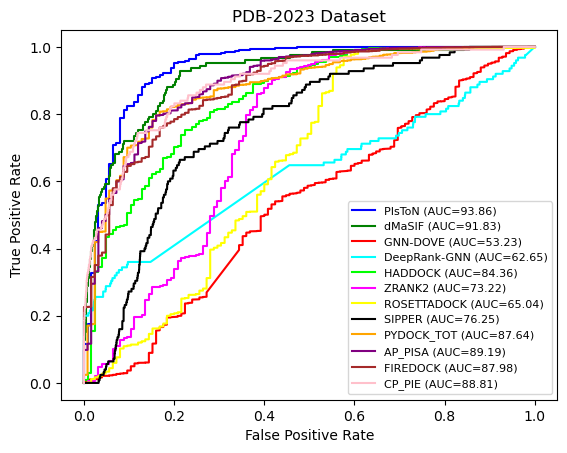

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_ROC(df, score_name, label_name, model_name, ax, color, pos_label):
    fpr, tpr, thresh = roc_curve(df[label_name], df[score_name], pos_label=pos_label)
    AUC = auc(fpr, tpr)
    ax.plot(fpr, tpr, linestyle='-',color=color, label=f'{model_name} (AUC={int(AUC*10000)/100})')


fig, ax = plt.subplots()
colors = ['blue', 'green', 'red', 'cyan', 'lime', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink']
plot_ROC(PDB2023_scores, 'PIsToN', 'label', 'PIsToN', ax, colors[0], pos_label=0)
plot_ROC(PDB2023_scores, 'dMaSIF', 'label', 'dMaSIF', ax, colors[1], pos_label=1)
plot_ROC(PDB2023_scores, 'GNN-DOVE', 'label', 'GNN-DOVE', ax, colors[2], pos_label=0)
plot_ROC(PDB2023_scores, 'DeepRank-GNN', 'label', 'DeepRank-GNN', ax, colors[3], pos_label=1)
plot_ROC(PDB2023_scores, 'HADDOCK', 'label', 'HADDOCK', ax, colors[4], pos_label=0)
plot_ROC(PDB2023_scores, 'ZRANK2', 'label', 'ZRANK2', ax, colors[5], pos_label=0)
plot_ROC(PDB2023_scores, 'ROSETTADOCK', 'label', 'ROSETTADOCK', ax, colors[6], pos_label=0)
plot_ROC(PDB2023_scores, 'SIPPER', 'label', 'SIPPER', ax, colors[7], pos_label=1)
plot_ROC(PDB2023_scores, 'PYDOCK_TOT', 'label', 'PYDOCK_TOT', ax, colors[8], pos_label=0)
plot_ROC(PDB2023_scores, 'AP_PISA', 'label', 'AP_PISA', ax, colors[9], pos_label=0)
plot_ROC(PDB2023_scores, 'FIREDOCK', 'label', 'FIREDOCK', ax, colors[10], pos_label=0)
plot_ROC(PDB2023_scores, 'CP_PIE', 'label', 'CP_PIE', ax, colors[11], pos_label=1)

plt.title('PDB-2023 Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

legend_font_size = 8  
plt.legend(loc='best', prop={'size': legend_font_size})

plt.show();

## Compute Success rate

In [24]:
import numpy as np
df = PDB2023_scores
df['target'] = df['PID']
all_targets = list(df['target'].unique())


def compute_success_rate(method, ascending):
    top1 = 0
    top3 = 0
    top5=0
    top10 = 0
    top25 = 0
    top100= 0
    top200 = 0
    for target in all_targets:
        target_df = df[df['target']==target]
        target_df = target_df.sort_values(by=method, ascending=ascending).reset_index(drop=True)
        if 1 in list(target_df[:1]['label']):
             top1+=1
        if 1 in list(target_df[:3]['label']):
             top3+=1
        if 1 in list(target_df[:5]['label']):
             top5+=1
        if 1 in list(target_df[:10]['label']):
            top10+=1
        if 1 in list(target_df[:25]['label']):
            top25+=1
        if 1 in list(target_df[:100]['label']):
             top100+=1
        if 1 in list(target_df[:200]['label']):
            top200+=1
    all_success_rate = [top1,top3, top5, top10, top25, top100, top200]

    all_success_rate = [int(x*100/len(all_targets)) for x in all_success_rate]
    return all_success_rate


methods = ['PIsToN','DeepRank-GNN', 'GNN-DOVE','dMaSIF', 'HADDOCK', 'AP_PISA','CP_PIE', 'FIREDOCK','PYDOCK_TOT', 'ZRANK2','ROSETTADOCK','SIPPER']
all_scores = []
for method in methods:
    if method=='DeepRank-GNN' or method=='GNN-DOVE' or method=='dMaSIF' or method=='HADDOCK' or method=='FIREDOCK'or method=='AP_PISA'\
        or method=='CP_PIE'or method=='PYDOCK_TOT' or method=='ZRANK2'or method=='ROSETTADOCK'or method=='SIPPER':
        all_scores.append([method]+compute_success_rate(method, False))
    else:
        all_scores.append([method]+compute_success_rate(method, True))

df_top = pd.DataFrame(all_scores, columns=['model','top1','top3', 'top5', 'top10', 'top25', 'top100', 'top200'])
df_top


,model,top1,top3,top5,top10,top25,top100,top200
0,PIsToN,88,94,94,96,98,100,100
1,DeepRank-GNN,36,40,46,48,67,100,100
2,GNN-DOVE,3,5,19,19,34,100,100
3,dMaSIF,51,73,80,84,94,100,100
4,HADDOCK,0,0,0,1,1,100,100
5,AP_PISA,0,0,1,1,5,100,100
6,CP_PIE,76,84,88,92,96,100,100
7,FIREDOCK,0,0,0,3,11,100,100
8,PYDOCK_TOT,0,0,0,0,3,100,100
9,ZRANK2,0,0,3,11,23,100,100


## Compute AP, BA, F1, Precision, Recall

In [25]:
from sklearn.metrics import matthews_corrcoef, f1_score, balanced_accuracy_score, auc, precision_score, average_precision_score, recall_score, precision_recall_curve
import random

all_results = []
all_thresholds = []
all_matthews = []
df = df.dropna()


def find_threshold_one_fold(df, score_name, label_name):
    precision, recall, thresholds = precision_recall_curve(df[label_name], df[score_name])
    max_matthews = 0
    optimal_threshold = 0
    labels = df[label_name]
    for thr in thresholds:
        pred_labels = df[score_name].apply(lambda x: int(x>thr))
        matthews = matthews_corrcoef(labels, pred_labels)
        if matthews>max_matthews:
            max_matthews = matthews
            optimal_threshold = thr
    return optimal_threshold, max_matthews


def find_optimal_threshold(df, score_name, label_name, reverse_sign=True):
    
    df = df.copy()
    if reverse_sign:
        df[score_name] = - df[score_name]

    all_thresholds = []
    all_matthews = []
    shuffled = df.sample(frac=1, random_state=15)
    all_chunks = np.array_split(shuffled, 10)
    labels = df[label_name]
    for cv_df in all_chunks:
        cv_optimal, cv_matthews = find_threshold_one_fold(cv_df, score_name, label_name)
        all_thresholds.append(cv_optimal)
        all_matthews.append(cv_matthews)
        
    optimal_threshold = np.mean(all_thresholds)
    pred_labels = df[score_name].apply(lambda x: int(x>optimal_threshold))
    AP = average_precision_score(df[label_name], pred_labels)
    balanced_accuracy = balanced_accuracy_score(labels, pred_labels)
    f1 = f1_score(labels, pred_labels)
    precision = precision_score(labels, pred_labels)
    
    recall = recall_score(labels, pred_labels)
    
    if reverse_sign:
        all_thresholds = [-x for x in all_thresholds]
        optimal_threshold = np.mean(all_thresholds)

    print(f"Optimal threshold: {optimal_threshold}; AP= {AP}, BA={balanced_accuracy}, F1={f1}, Precision={precision};  Recall={recall}")
    return all_thresholds, all_matthews, [AP, balanced_accuracy, f1, precision, recall]



for i in range(len(methods)):
    print("")
    print(methods[i])
    thresholds, matthews, metrics = find_optimal_threshold(PDB2023_scores, methods[i], 'label', reverse_sign=True)
    
    all_results.append([methods[i]]+metrics)
    all_thresholds.append([methods[i]]+thresholds)
    all_matthews.append([methods[i]]+matthews)
    
metrics_df = pd.DataFrame(all_results, columns=['Method','AP', 'BA','F1', 'Precision', 'Recall'])

metrics_df


PIsToN
Optimal threshold: -0.07073186599999999; AP= 0.45849752420114787, BA=0.7821236421094213, F1=0.6604651162790697, Precision=0.7888888888888889;  Recall=0.568

DeepRank-GNN
Optimal threshold: 0.0023906470999999997; AP= 0.024288102768958042, BA=0.5036073474224768, F1=0.036939313984168866, Precision=0.027559055118110236;  Recall=0.056

GNN-DOVE
Optimal threshold: 0.13484000000000002; AP= 0.025487877536561312, BA=0.5258937388899863, F1=0.051599587203302384, Precision=0.027578599007170437;  Recall=0.4

dMaSIF
Optimal threshold: 0.6816592932000001; AP= 0.018476502495330477, BA=0.234615050365396, F1=0.021149241819632878, Precision=0.010845099242889298;  Recall=0.424

HADDOCK
Optimal threshold: -120.881188; AP= 0.26087474591715143, BA=0.6779261307525183, F1=0.4712041884816754, Precision=0.6818181818181818;  Recall=0.36

AP_PISA
Optimal threshold: -0.31682; AP= 0.21675125748063298, BA=0.6802472842188425, F1=0.44019138755980863, Precision=0.5476190476190477;  Recall=0.368

CP_PIE
Optimal t

,Method,AP,BA,F1,Precision,Recall
0,PIsToN,0.458498,0.782124,0.660465,0.788889,0.568
1,DeepRank-GNN,0.024288,0.503607,0.036939,0.027559,0.056
2,GNN-DOVE,0.025488,0.525894,0.051600,0.027579,0.400
3,dMaSIF,0.018477,0.234615,0.021149,0.010845,0.424
4,HADDOCK,0.260875,0.677926,0.471204,0.681818,0.360
5,AP_PISA,0.216751,0.680247,0.440191,0.547619,0.368
6,CP_PIE,0.023923,0.467065,0.004000,0.002667,0.008
7,FIREDOCK,0.166822,0.673877,0.387931,0.420561,0.360
8,PYDOCK_TOT,0.104801,0.593037,0.268156,0.444444,0.192
9,ZRANK2,0.233094,0.661926,0.438503,0.661290,0.328


# 7. MaSIF-test dataset

## Obtain scores for all methods 

4 samples are discarded from the dataset, because some methods could not deal with them. 

In [26]:
MaSIF_scores = pd.read_csv('MaSIF-Search_scores&labels.csv')
MaSIF_scores


,PDB,label,PID,HADDOCK,ZRANK2,ROSETTADOCK,PYDOCK_TOT,SIPPER,AP_PISA,FIREDOCK,CP_PIE,PIsToN,GNN-DOVE,DeepRank-GNN,dMaSIF
0,1A79-model-2-pos,1,1A79,-153.704540,127.7760,16.275,-8.836,-0.769,-0.1546,-0.26,0.650986,-0.000423,0.2314,0.006534,-0.032934
1,1A79-model-34-neg,0,1A79,-78.301740,-285.4660,-5.696,-42.356,-0.706,-0.5599,-39.85,1.892280,1.943733,0.3611,0.005598,-1.289589
2,1ACB-model-1-pos,1,1ACB,-122.271900,-45.4688,11.605,-6.647,-0.365,-0.0682,-18.97,0.505204,-1.556206,0.2274,0.010280,2.688919
3,1ACB-model-48-neg,0,1ACB,-74.175980,-269.2270,-5.951,-42.551,11.700,-0.4861,-76.01,1.340167,1.125549,0.3332,0.004418,-0.477317
4,1AGQ-model-1-pos,1,1AGQ,-233.464900,-69.4251,5.729,-6.065,2.274,-0.0300,-7.92,0.705139,-1.862376,0.4826,0.032576,2.765862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,5JLV-model-68-pos,1,5JLV,-79.404970,-148.1060,-2.154,-24.282,1.625,-0.1070,-8.68,0.665731,0.703482,0.2274,0.019146,0.659648
1348,5JMC-model-17-pos,1,5JMC,-68.651020,-99.3471,-0.968,-11.617,3.385,-0.1676,-13.73,0.806971,0.033798,0.2274,0.198292,-0.065815
1349,5JMC-model-62-neg,0,5JMC,-51.950944,-183.1740,-5.046,-18.350,0.366,-0.1963,-24.51,0.931448,1.856708,0.3102,0.006570,-0.610820
1350,5JYL-model-1-pos,1,5JYL,-122.477660,-60.8082,1.386,-12.800,-2.387,-0.0429,1.31,0.635605,0.966730,0.2970,0.018076,0.871308


## Compute AUC

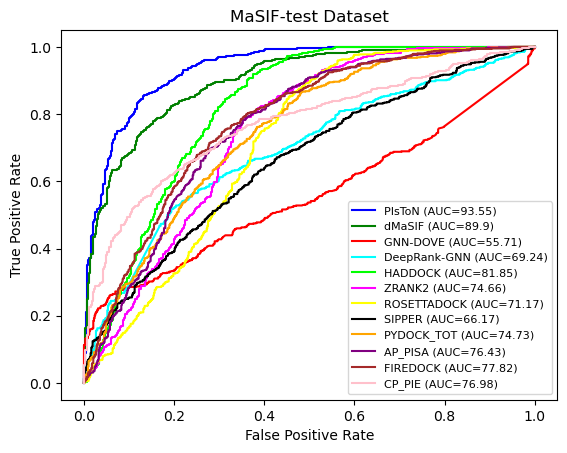

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_ROC(df, score_name, label_name, model_name, ax, color, pos_label):
    fpr, tpr, thresh = roc_curve(df[label_name], df[score_name], pos_label=pos_label)
    AUC = auc(fpr, tpr)
    ax.plot(fpr, tpr, linestyle='-',color=color, label=f'{model_name} (AUC={int(AUC*10000)/100})')


fig, ax = plt.subplots()
colors = ['blue', 'green', 'red', 'cyan', 'lime', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink']
plot_ROC(MaSIF_scores, 'PIsToN', 'label', 'PIsToN', ax, colors[0], pos_label=0)
plot_ROC(MaSIF_scores, 'dMaSIF', 'label', 'dMaSIF', ax, colors[1], pos_label=1)
plot_ROC(MaSIF_scores, 'GNN-DOVE', 'label', 'GNN-DOVE', ax, colors[2], pos_label=1)
plot_ROC(MaSIF_scores, 'DeepRank-GNN', 'label', 'DeepRank-GNN', ax, colors[3], pos_label=1)
plot_ROC(MaSIF_scores, 'HADDOCK', 'label', 'HADDOCK', ax, colors[4], pos_label=0)
plot_ROC(MaSIF_scores, 'ZRANK2', 'label', 'ZRANK2', ax, colors[5], pos_label=1)
plot_ROC(MaSIF_scores, 'ROSETTADOCK', 'label', 'ROSETTADOCK', ax, colors[6], pos_label=1)
plot_ROC(MaSIF_scores, 'SIPPER', 'label', 'SIPPER', ax, colors[7], pos_label=0)
plot_ROC(MaSIF_scores, 'PYDOCK_TOT', 'label', 'PYDOCK_TOT', ax, colors[8], pos_label=1)
plot_ROC(MaSIF_scores, 'AP_PISA', 'label', 'AP_PISA', ax, colors[9], pos_label=1)
plot_ROC(MaSIF_scores, 'FIREDOCK', 'label', 'FIREDOCK', ax, colors[10], pos_label=1)
plot_ROC(MaSIF_scores, 'CP_PIE', 'label', 'CP_PIE', ax, colors[11], pos_label=0)

plt.title('MaSIF-test Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

legend_font_size = 8  
plt.legend(loc='best', prop={'size': legend_font_size})

plt.show();

## Compute AP, BA, F1, Precision, Recall

In [28]:
from sklearn.metrics import matthews_corrcoef, f1_score, balanced_accuracy_score, auc, precision_score, average_precision_score, recall_score, precision_recall_curve
import random
df= MaSIF_scores

all_results = []
all_thresholds = []
all_matthews = []
df = df.dropna()


def find_threshold_one_fold(df, score_name, label_name):
    precision, recall, thresholds = precision_recall_curve(df[label_name], df[score_name])
    max_matthews = 0
    optimal_threshold = 0
    labels = df[label_name]
    for thr in thresholds:
        pred_labels = df[score_name].apply(lambda x: int(x>thr))
        matthews = matthews_corrcoef(labels, pred_labels)
        if matthews>max_matthews:
            max_matthews = matthews
            optimal_threshold = thr
    return optimal_threshold, max_matthews


def find_optimal_threshold(df, score_name, label_name, reverse_sign=True):
   
    df = df.copy()
    if reverse_sign:
        df[score_name] = - df[score_name]

    all_thresholds = []
    all_matthews = []
    shuffled = df.sample(frac=1, random_state=15)
    all_chunks = np.array_split(shuffled, 10)
    labels = df[label_name]
    for cv_df in all_chunks:
        cv_optimal, cv_matthews = find_threshold_one_fold(cv_df, score_name, label_name)
        all_thresholds.append(cv_optimal)
        all_matthews.append(cv_matthews)
        
    optimal_threshold = np.mean(all_thresholds)
    pred_labels = df[score_name].apply(lambda x: int(x>optimal_threshold))
    AP = average_precision_score(df[label_name], pred_labels)
    balanced_accuracy = balanced_accuracy_score(labels, pred_labels)
    f1 = f1_score(labels, pred_labels)
    precision = precision_score(labels, pred_labels)
    
    recall = recall_score(labels, pred_labels)
    
    if reverse_sign:
        all_thresholds = [-x for x in all_thresholds]
        optimal_threshold = np.mean(all_thresholds)

    print(f"Optimal threshold: {optimal_threshold}; AP= {AP}, BA={balanced_accuracy}, F1={f1}, Precision={precision};  Recall={recall}")
    return all_thresholds, all_matthews, [AP, balanced_accuracy, f1, precision, recall]


methods = ['PIsToN','DeepRank-GNN', 'GNN-DOVE','dMaSIF', 'HADDOCK', 'AP_PISA','CP_PIE', 'FIREDOCK','PYDOCK_TOT', 'ZRANK2','ROSETTADOCK','SIPPER']

for i in range(len(methods)):
    print("")
    print(methods[i])
    thresholds, matthews, metrics = find_optimal_threshold(MaSIF_scores, methods[i], 'label', reverse_sign=True)
    
    all_results.append([methods[i]]+metrics)
    all_thresholds.append([methods[i]]+thresholds)
    all_matthews.append([methods[i]]+matthews)
    
metrics_df = pd.DataFrame(all_results, columns=['Method','AP', 'BA','F1', 'Precision', 'Recall'])

metrics_df


PIsToN
Optimal threshold: 0.897297418; AP= 0.8107708614825514, BA=0.8542899408284024, F1=0.8497330282227309, Precision=0.8771653543307086;  Recall=0.8239644970414202

DeepRank-GNN
Optimal threshold: 0.0577919533; AP= 0.4792013711293282, BA=0.45636094674556216, F1=0.6205472379969025, Precision=0.4766058683584457;  Recall=0.8890532544378699

GNN-DOVE
Optimal threshold: 0.23656999999999995; AP= 0.5085927122328221, BA=0.5162721893491125, F1=0.3876404494382022, Precision=0.5280612244897959;  Recall=0.3062130177514793

dMaSIF
Optimal threshold: 0.0; AP= 0.4555258226481581, BA=0.19600591715976334, F1=0.1352426412092283, Precision=0.14629948364888123;  Recall=0.1257396449704142

HADDOCK
Optimal threshold: -92.15575859999998; AP= 0.7393951127172604, BA=0.7655325443786982, F1=0.7177203918076581, Precision=0.901565995525727;  Recall=0.5961538461538461

AP_PISA
Optimal threshold: 0.058010000000000006; AP= 0.4912899040186993, BA=0.4822485207100592, F1=0.6432212028542303, Precision=0.49066874027993

,Method,AP,BA,F1,Precision,Recall
0,PIsToN,0.810771,0.854290,0.849733,0.877165,0.823964
1,DeepRank-GNN,0.479201,0.456361,0.620547,0.476606,0.889053
2,GNN-DOVE,0.508593,0.516272,0.387640,0.528061,0.306213
3,dMaSIF,0.455526,0.196006,0.135243,0.146299,0.125740
4,HADDOCK,0.739395,0.765533,0.717720,0.901566,0.596154
5,AP_PISA,0.491290,0.482249,0.643221,0.490669,0.933432
6,CP_PIE,0.635587,0.705621,0.742894,0.659404,0.850592
7,FIREDOCK,0.483263,0.465237,0.627895,0.481452,0.902367
8,PYDOCK_TOT,0.485322,0.469675,0.633997,0.484022,0.918639
9,ZRANK2,0.490580,0.480769,0.641104,0.489844,0.927515
